In [1]:
import pandas_datareader.data as web
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import glob
from IPython.display import clear_output

In [2]:
fl = glob.glob('data/*.xlsx');fl

['data\\etf_data.xlsx']

In [3]:
# etf list
etf_list = pd.read_excel(fl[0])

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
etf_list.종목코드 = etf_list.종목코드.astype(str)

In [5]:
# 국내 모든 etf의 5년치 가격데이터를 가져온다 
etf_prices = []
error_codes = []
for i,e in enumerate(etf_list.종목코드):
    try:
        a = web.DataReader(e,'naver',start='2016')
        a['code'] = e
        etf_prices.append(a)
        clear_output(wait=True)
        print(f"{i+1}/{len(etf_list)} ({(i+1)/len(etf_list):.2%})")
    except:
        print('error at',e)
        error_codes.append(e)
    print(f'error rate: {len(error_codes)/len(etf_list):.2%}')

476/476 (100.00%)
error rate: 1.89%


In [27]:
etf_p = pd.concat(etf_prices)

In [28]:
etf_p = etf_p.reset_index().merge(etf_list[['종목코드','종목명','기초지수_지수명']],how='left',left_on='code',right_on='종목코드').set_index('Date')

In [29]:
etf_p.loc[:,'Open':'Volume'] = etf_p.loc[:,'Open':'Volume'].astype(float)

In [30]:
etf_p['ret1m'] = etf_p.groupby('code').Close.pct_change(22)
etf_p['ret3m'] = etf_p.groupby('code').Close.pct_change(22*3)
etf_p['ret1y'] = etf_p.groupby('code').Close.pct_change(250)

In [31]:
etf_p.head(2)

,Open,High,Low,Close,Volume,code,종목코드,종목명,기초지수_지수명,ret1m,ret3m,ret1y
Date,,,,,,,,,,,,
2016-01-04,21969.0,21969.0,21602.0,21607.0,576523.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN
2016-01-05,21637.0,21818.0,21602.0,21734.0,269361.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN


In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [34]:
etf_p.head()

,Open,High,Low,Close,Volume,code,종목코드,종목명,기초지수_지수명,ret1m,ret3m,ret1y
Date,,,,,,,,,,,,
2016-01-04,21969.0,21969.0,21602.0,21607.0,576523.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN
2016-01-05,21637.0,21818.0,21602.0,21734.0,269361.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN
2016-01-06,21777.0,21777.0,21483.0,21607.0,387527.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN
2016-01-07,21602.0,21637.0,21336.0,21395.0,37938.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN
2016-01-08,21259.0,21567.0,21219.0,21531.0,249821.0,152100,152100,ARIRANG 200,코스피 200,NaN,NaN,NaN


In [35]:
etfx = etf_p.pivot(columns='종목코드',values='ret1m').tail(1000)

In [39]:
etfx.head(2)

종목코드,100910,101280,102110,102780,102960,102970,104520,104530,105010,105190,...,377990,379780,379790,379800,379810,380340,381170,381180,381560,381570
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-29,0.033699,-0.014932,0.042149,0.050579,0.039663,0.024669,0.020241,0.013307,-0.027577,0.042184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-30,0.040714,-0.006178,0.046018,0.051594,0.018483,0.024847,0.025741,0.028748,-0.018529,0.044854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
import seaborn as sns

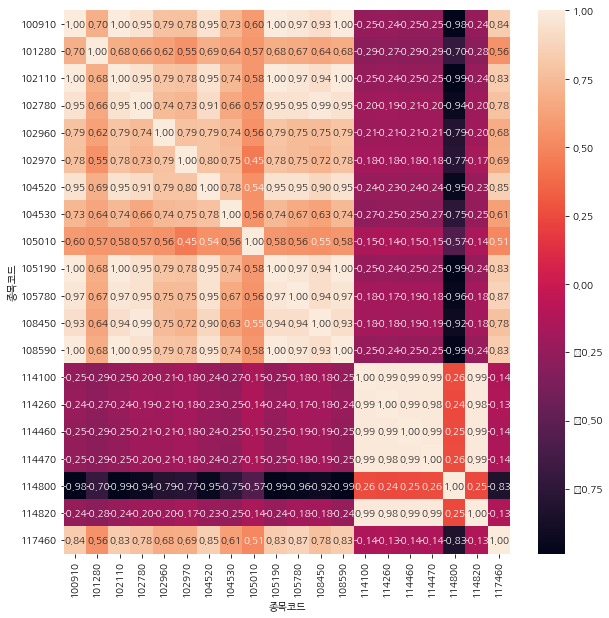

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(etfx.iloc[:,:20].corr(),annot=True,ax=ax,fmt='.2f')

In [57]:
eff = etf_p.groupby('종목명').ret1m.agg([np.mean,np.std])

C:\Users\jeong\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



C:\Users\jeong\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\jeong\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



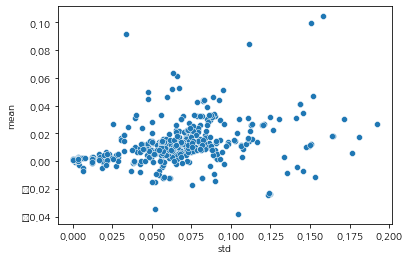

In [59]:
sns.scatterplot('std','mean',data=eff)